### 항공사 고객 만족도 예측 - c4nd0it

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('./data/airline_train.csv')
data = data.drop('id', axis=1) # id 제외하고 분석

test = pd.read_csv('./data/airline_test.csv')
test = test.drop('id', axis=1) # id 제외하고 분석

pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 함
data.head() # 데이터 확인

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


### 데이터 정보 확인

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

### NULL 값 확인

In [4]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

### Baseline 기반 데이터 시각화

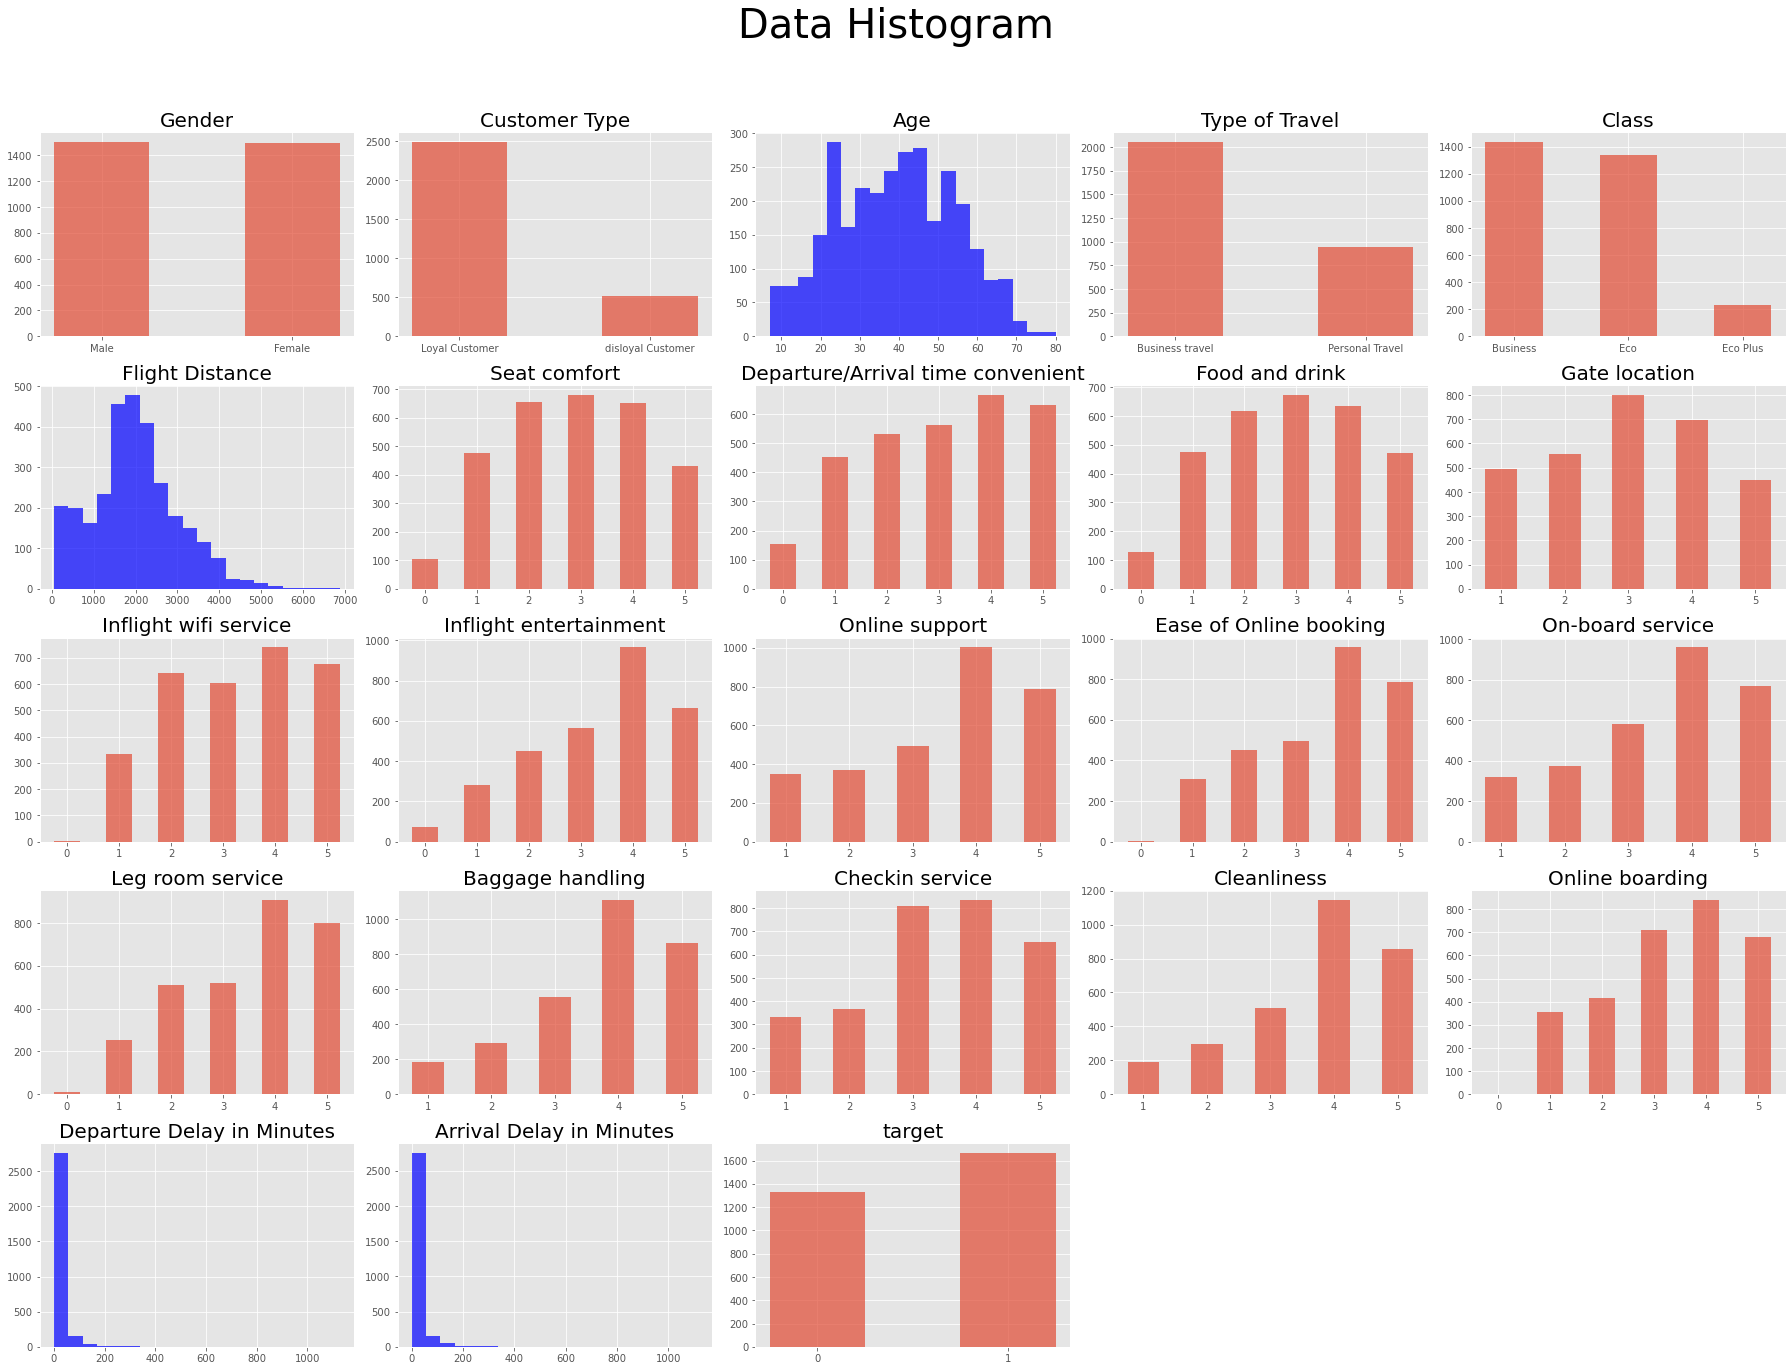

In [5]:
plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(25, 20))
plt.suptitle("Data Histogram", fontsize = 40)

# id는 제외하고 시각화
cols = data.columns
for i in range(len(cols)):
    plt.subplot(5, 5, i+1) # 최대 5 by 5, 25개의 특징 분포를 확인할 으수 있습니다.
    plt.title(cols[i], fontsize=20) # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(data[cols[i]].unique()) > 20: # 해당 특징의 고유한 값 종류가 20개가 넘으면
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7) # 히스토그램을 출력합니다. bins는 칸을 나누는 값이며 alpha는 투명도입니다.
        
    else: # 해당 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = data[cols[i]].value_counts() # 각 특징의 값 종류의 개수들을 temp에 저장합니다.
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

파란 그래프는 연속된 값들을 나타내는 것이며, 좌측으로 값들이 쏠려있는 것을 볼 수 있다.

### Violin Plot으로 target, feature들의 관계 확인

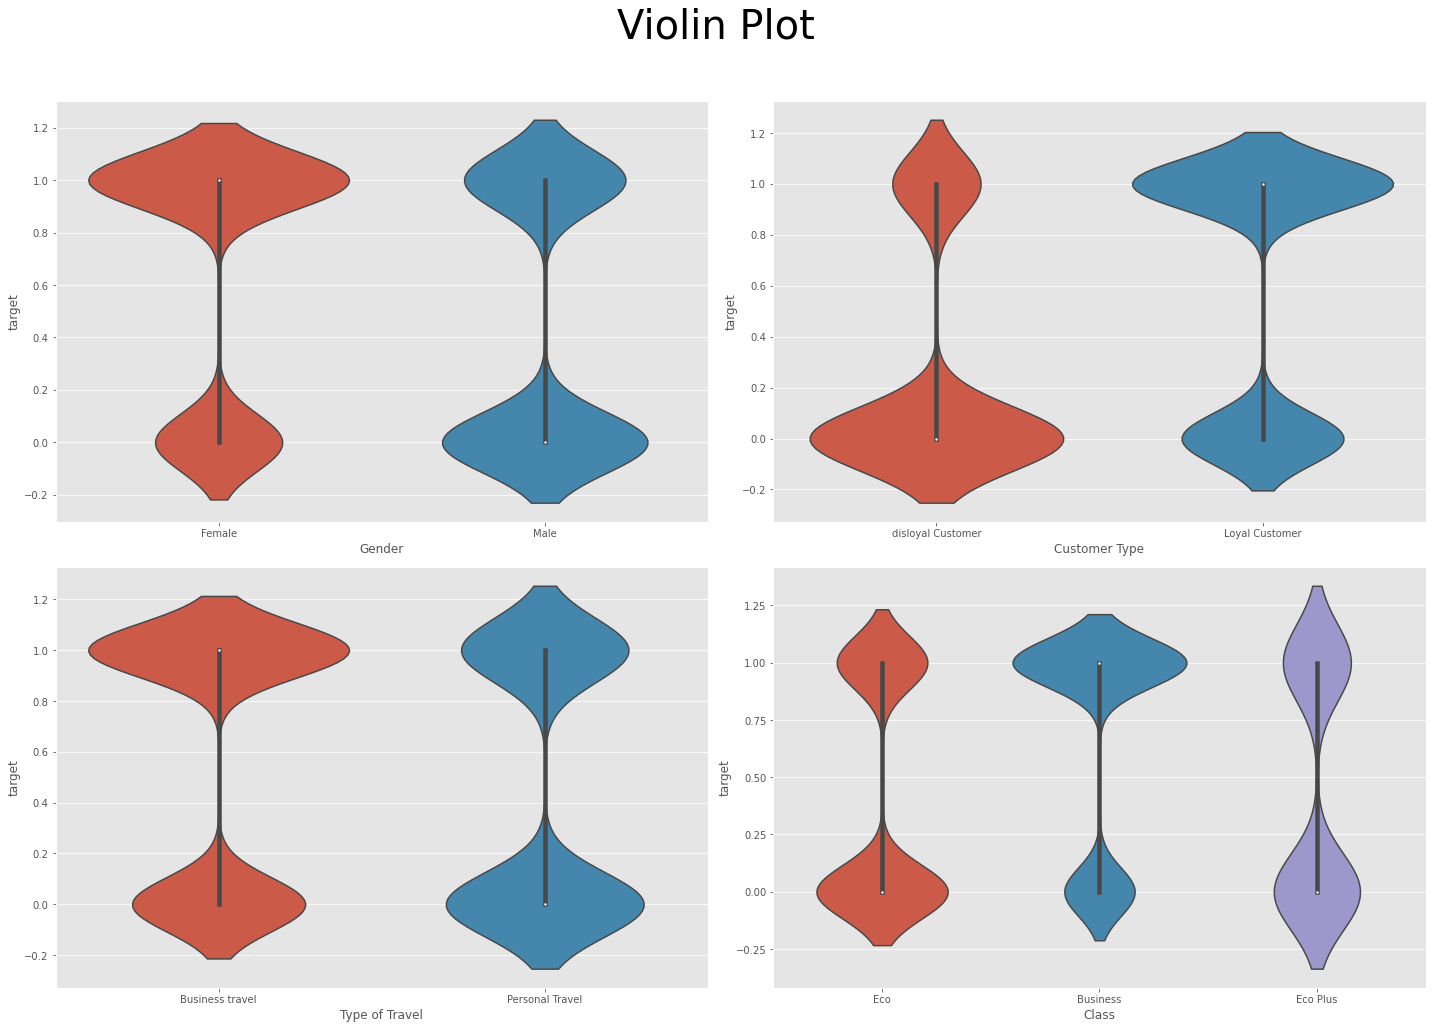

In [6]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[categorical_feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

위 결과를 봤을때 Gender와 Customer Type이 target과의 관계에서 굉장히 유의미한 관계를 형성하고 있다는 것을 볼 수 있다.